# Tarea 11: Más pruebas de hipótesis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multinomial, norm, uniform

# Distribución multinomial

Mendel criaba chícharos de semillas lisas amarillas y de semillas corrugadas verdes. Éstas daban lugar a 4 tipos de descendientes: amarillas lisas, amarillas corrugadas, verdes lisas, y verdes corrugadas. El número de cada una es multinomial con parámetro $p=(p_1,p_2,p_3,p_4)$. De acuerdo a su teoría de herencia este vector de probabilidades es:
$$p=\left(\frac{9}{16},\frac{3}{16},\frac{3}{16},\frac{1}{16}\right)$$

A lo largo de $n=556$ esperimentos observó $x=(315,101,108,32)$. Utiliza la prueba de cociente de verosimilitudes para probar $H_0:p=p_0$ contra $H_A:p\neq p_0$

## Función de verosimilitud

Recordando que la función de densidad de una distribución multinomial queda dada por: 
$$f(x_1,...,x_k;n;p_1,...,p_k)=\frac{n!}{x_1!\cdot ...\cdot x_k!}\cdot p_1^{x_1}\cdot ...\cdot p_k^{x_k}$$

Una función con 4 parámetros, entonces queda dada por:
$$f=\frac{n!}{x_1!x_2!x_3!x_4!}p_1^{x_1}p_2^{x_2}p_3^{x_3}p_4^{x_4}$$

Por lo que la fución de probabilidad conjunta es:
$$L(f)=\frac{n!}{x_{11}!x_{21}!x_{31}!x_{41}!}p_1^{x_{11}}p_2^{x_{21}}p_3^{x_{31}}p_4^{x_{41}}\cdot ...\cdot \frac{n!}{x_{1i}!x_{2i}!x_{3i}!x_{4i}!}p_1^{x_{1i}}p_2^{x_{2i}}p_3^{x_{3i}}p_4^{x_{4i}}$$

$$L(f)=\prod_{i=1}^k\frac{n!}{x_{1i}!x_{2i}!x_{3i}!x_{4i}!}p_1^{x_{1i}}p_2^{x_{2i}}p_3^{x_{3i}}p_4^{x_{4i}}$$

Calculando el logaritmo:
$$ln[L(f)] = \sum_{i=1}^k ln\left[\frac{n!}{x_{1i}!x_{2i}!x_{3i}!x_{4i}!} + p_1^{x_{1i}}p_2^{x_{2i}}p_3^{x_{3i}}p_4^{x_{4i}}\right]$$

$$= \sum_{i=1}^k \left[ln\frac{n!}{x_{1i}!x_{2i}!x_{3i}!x_{4i}!} + \sum_{j=1}^4 x_{ji}ln(p_j)\right]$$

## Memoria de cálculo

**Paso 1**: Calculamos las probabilidades de máxima verosimilitud $p$, que son $p=\left(\frac{315}{556},\frac{101}{556},\frac{108}{556},\frac{32}{556}\right)$

In [2]:
experimentos = 556
observaciones = np.array([315,101,108,32])
p_observada = observaciones / experimentos
p_observada

array([0.56654676, 0.18165468, 0.1942446 , 0.05755396])

**Paso 2**: Evaluamos la verosimilitud

In [3]:
verosimilitud =  np.sum(observaciones * np.log(p_observada))
verosimilitud

-619.5858967532752

**Paso 3**: Evaluamos verosimilitud según $H_0$ dada $p=\left(\frac{9}{16},\frac{3}{16},\frac{3}{16},\frac{1}{16}\right)$

In [4]:
p_h0 = np.array([9,3,3,1]) / 16
verosim_h0 = np.sum(observaciones * np.log(p_h0))#- np.sum(np.log(observaciones))
verosim_h0

-619.8236193727744

**Paso 3.b**: Se obtiene el cociente de verosimilitudes de referencia

In [5]:
lambda_ref = 2 * (verosimilitud - verosim_h0)
lambda_ref

0.47544523899841806

**Paso 4**: Obtenemos la distribución de referencia

In [6]:
#Se generan valores de x distirbuidos multinomialmente con probabilidad p
boots_dist = multinomial.rvs(n=experimentos, p=p_h0, size=10_000)

#Se evalúa en la función de verosimilitud
boots_dist = np.apply_along_axis(func1d=lambda x: np.sum(x * np.log(p_h0)), axis=1, arr=boots_dist)
boots_dist[:5]

array([-608.83749649, -601.14721047, -623.11945624, -583.56941385,
       -630.80974226])

**Paso 5**: Se calcula el cociente de verosimilitudes

In [7]:
cociente_vers = 2 * (boots_dist - verosim_h0)
cociente_vers[:5]

array([ 21.97224577,  37.35281781,  -6.59167373,  72.50841105,
       -21.97224577])

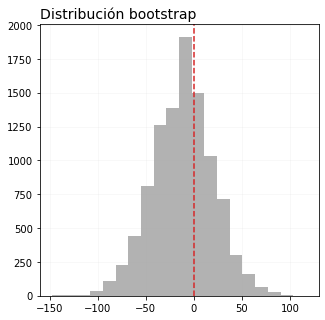

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

#Contenido de figura
ax.hist(x=cociente_vers, bins=20, color='grey', alpha=0.6)
ax.axvline(x=lambda_ref, ymin=0, ymax=1, color='tab:red', linestyle='--', label='lambda')

#Anotaciones y estilo
ax.set_title("Distribución bootstrap", fontsize=14, loc='left')
ax.grid(alpha=0.1)
#ax.legend()

plt.show()

**Observamos** que $\lambda$ de referencia se encuentra en la zona central de la distribución de referencia. Esto nos da evidancia a favor de la hipótesis nula $H_0$.

Obtenemos el valor p para una prueba de dos colas.

In [9]:
valor_p = 2 * np.mean(cociente_vers > lambda_ref)
valor_p

0.7066

# Distribución uniforme

Sea $X=(X_1,...,X_n)\backsim Uniforme(0,\theta)$ y $T=max(X)$ (el máximo de X), queremos probar: $H_0:\theta=\frac{1}{2}$ contra $H_1:\theta >\frac{1}{2}$.

En esta caso la prueba de Wald no es apropiada pues $T$ no converge a la Normal. Supongamos que decidimos probar la hipótesis rechazando $H_0$ si $T>c$.
* Encuentra la función de poder.
* ¿Qué valor de $c$ correponde a un tamaño de prueba $\alpha =0.05$?
* En una muestra de tamaño $n=20$ con $T=0.48$ ¿cuál es el valor $p$?¿Qué concluyes acerca de $H_0$?
* En una muestra de tamaño $n=20$ con $T=0.52$ ¿cuál es el valor $p$?¿Qué concluyes acerca de $H_0$?

La función de **potencia** queda definida como: $\beta (\theta) = P_{\theta}(\theta > 1/2)$

In [22]:
uniform.rvs(0, 0.5, size=20)

array([0.15446802, 0.03737314, 0.11931807, 0.12744529, 0.36930286,
       0.45401422, 0.26256971, 0.2823176 , 0.0249746 , 0.39762906,
       0.09459279, 0.20688513, 0.2149396 , 0.21657463, 0.36816283,
       0.05833495, 0.05576628, 0.15007991, 0.18986915, 0.27669654])

# Distribución poisson

Sean $X_1,...,X_n\backsim Poisson(\lambda)$,
* Sea $\lambda_0 > 0$ ¿Cuál es la prueba de Wald para $H_0:\lambda = \lambda_0$ y $H_1:\lambda\neq\lambda_0$ 
* Si $\lambda_0=1$, $n=20$, $\alpha=0.05$, simula $X_1,...,X_n\backsim Poisson(\lambda_0)$ y realiza una prueba Wald. Repite 1,000 veces y registra el porcentaje de veces que rechazas $H_0$, ¿qué tan cerca te queda el error tipo 1 de $\alpha=0.05$?